In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew


In [3]:
#reading and converting csv file to data frame
df = pd.read_csv("/Users/rathikakn/Desktop/Guvi/Project4coppermodeling/Copper_Set.csv")


In [4]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [5]:
# verify the unique values in each columns.
for i in list(df.columns):
    print(f"{i}:{df[i].nunique()}")

id:181671
item_date:252
quantity tons:181673
customer:1169
country:17
status:9
item type:7
application:30
thickness:594
width:1386
material_ref:16563
product_ref:33
delivery date:28
selling_price:9795


In [6]:
# Verify the datatypes.
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [ ]:
# converting the datatypes from object to numeric.

df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')

In [7]:
# correcting date format.

df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df.head(10)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00
5,FE372230-29B1-4A29-BB73-CB9D3078C286,2021-04-01,225.790676,30202938.0,25.0,Won,W,41.0,1.50,1265.0,0000000000000000000000000000000000102325,1668701718,2021-04-01,983.00
6,E1B47219-42C8-411D-AE46-AD5256DC4757,2021-04-01,3.522613,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,NBW_L+_A_1125_0.4,611993,2021-07-01,18.00
7,AA3F18A2-A7D6-43DE-8644-F0632AE2CB68,2021-04-01,113.387124,30342192.0,32.0,Won,W,41.0,0.68,1220.0,0000000000000000000000000000000001000944,611993,2021-01-01,931.00
8,2851F48B-DA32-4DF3-884B-17A3100DD65A,2021-04-01,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,0000000000000000000000000000000000106786,1668701376,2021-07-01,1363.00
9,6E4D638C-A820-4A40-836F-C9D48BC65528,2021-04-01,630.626917,30202938.0,25.0,Won,W,41.0,1.50,1165.0,0000000000000000000000000000000000102325,1668701718,2021-04-01,983.00


In [8]:
#verify the data type of each features

df.dtypes

id                object
item_date         object
quantity tons    float64
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date     object
selling_price    float64
dtype: object

In [9]:
# additional change from date columns 

df['item_date'] = pd.to_datetime(df['item_date'])
df['delivery date'] = pd.to_datetime(df['delivery date'])
df['delivery_time_taken']=(df['item_date']-df['delivery date']).abs().dt.days

In [10]:
# checking the null values.
df.isnull().sum()

id                         2
item_date                  3
quantity tons              1
customer                   1
country                   28
status                     2
item type                  0
application               24
thickness                  1
width                      0
material_ref           77919
product_ref                0
delivery date              3
selling_price              1
delivery_time_taken        6
dtype: int64

In [11]:
# handling some unwanted values start with ('00000') and checking null values

df["material_ref"]= df["material_ref"].apply(lambda x: np.nan if str(x).startswith("00000") else x)
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,delivery_time_taken
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,91.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,2021-04-01,1047.00,0.0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,90.0
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,90.0
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,31.0


In [12]:
# droping the columns

df.drop(columns=['id','item_date','delivery date','material_ref'], inplace=True)
df

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_time_taken
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00,91.0
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00,0.0
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33,90.0
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00,90.0
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00,31.0
...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,591.00,1.0
181669,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,589.00,1.0
181670,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,619.00,1.0
181671,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,601.00,1.0


In [13]:
#checking values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181672.0,5.874926e+03,2.349081e+06,-2000.00,1.097030e+01,3.036464e+01,6.716061e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08
delivery_time_taken,181667.0,6.413128e+01,4.095861e+01,0.00,2.900000e+01,6.100000e+01,9.700000e+01,6.890000e+02


In [14]:
# quantity and selling price values should not be below 0. converting to null for below 0 values

df["quantity tons"]= df["quantity tons"].apply(lambda x: np.nan  if x<=0 else x)
df["selling_price"]= df["selling_price"].apply(lambda x: np.nan  if x<=0 else x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181668.0,5.875066e+03,2.349107e+06,0.00001,1.097122e+01,3.036501e+01,6.716134e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00000,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00000,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00000,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18000,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00000,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00000,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181665.0,1.918124e+03,3.318020e+05,0.10000,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08
delivery_time_taken,181667.0,6.413128e+01,4.095861e+01,0.00000,2.900000e+01,6.100000e+01,9.700000e+01,6.890000e+02


In [15]:
#checking null values
df.isnull().sum()

quantity tons           5
customer                1
country                28
status                  2
item type               0
application            24
thickness               1
width                   0
product_ref             0
selling_price           8
delivery_time_taken     6
dtype: int64

In [16]:
# Handling null values using median and mode

df['status'].fillna(df['status'].mode().iloc[0],inplace=True)

df['quantity tons'].fillna(df['quantity tons'].median(),inplace=True)
df['customer'].fillna(df['customer'].median(),inplace=True)
df['country'].fillna(df['country'].median(),inplace=True)
df['application'].fillna(df['application'].median(),inplace=True)
df['thickness'].fillna(df['thickness'].median(),inplace=True)
df['selling_price'].fillna(df['selling_price'].median(),inplace=True)
df['delivery_time_taken'].fillna(df['delivery_time_taken'].median(),inplace=True)

In [17]:
#checking null values

df.isnull().sum()

quantity tons          0
customer               0
country                0
status                 0
item type              0
application            0
thickness              0
width                  0
product_ref            0
selling_price          0
delivery_time_taken    0
dtype: int64

In [18]:
#checking data types

df.dtypes

quantity tons          float64
customer               float64
country                float64
status                  object
item type               object
application            float64
thickness              float64
width                  float64
product_ref              int64
selling_price          float64
delivery_time_taken    float64
dtype: object

In [19]:
#checking unique values in status column
df["status"].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [20]:
#checking unique values in item type column
df['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [21]:
#Mapping values to status column and using ordinalencoder to encode the values in item type column
df["status"]= df["status"].map({"Lost":0, "Won":1, "Draft":2, "To be approved":3, "Not lost for AM":4, "Wonderful":5, "Revised":6, "Offered":7, "Offerable":8})
df["item type"]= OrdinalEncoder().fit_transform(df[["item type"]])
df

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_time_taken
0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,854.00,91.0
1,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,1047.00,0.0
2,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,644.33,90.0
3,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,768.00,90.0
4,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,577.00,31.0
...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,591.00,1.0
181669,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,589.00,1.0
181670,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,619.00,1.0
181671,30.365013,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,601.00,1.0


In [22]:
#checking unique values after encoding
df["item type"].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [23]:
#checking null values finally
df.isnull().sum()

quantity tons          0
customer               0
country                0
status                 0
item type              0
application            0
thickness              0
width                  0
product_ref            0
selling_price          0
delivery_time_taken    0
dtype: int64

In [24]:
#describe used to check the values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181673.0,5.874905e+03,2.349075e+06,0.00001,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,12458.00000,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,25.00000,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.00000,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.00000,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561441e+01,1.775342e+01,2.00000,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,0.18000,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00000,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00000,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181673.0,1.918076e+03,3.317947e+05,0.10000,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


Skewness Handling- Fearture scaling (log transformation)

In [25]:
df1= df.copy()

In [26]:
#checking the skew for each features

for col in ['quantity tons', 'customer', 'country', 'application', 'thickness', 'width','product_ref', 'selling_price','delivery_time_taken']:
    print(col)
    print(skew(df1[col]))

quantity tons
424.68730994731504
customer
86.9845901502091
country
0.7538286488466676
application
0.7245583983073829
thickness
303.4450657126513
width
0.37459367901082125
product_ref
1.0152071910463223
selling_price
301.38559971625915
delivery_time_taken
0.46972996509615955


In [27]:
# find outliers - box plot& skewed data- hist plot & violin plot

def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data= df, x= column)
    plt.title(f'Box plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data= df, x=column, kde=True, bins=50)
    plt.title(f'Distribution plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data= df, x= column)
    plt.title(f'Violin plot for {column}')
    plt.show()

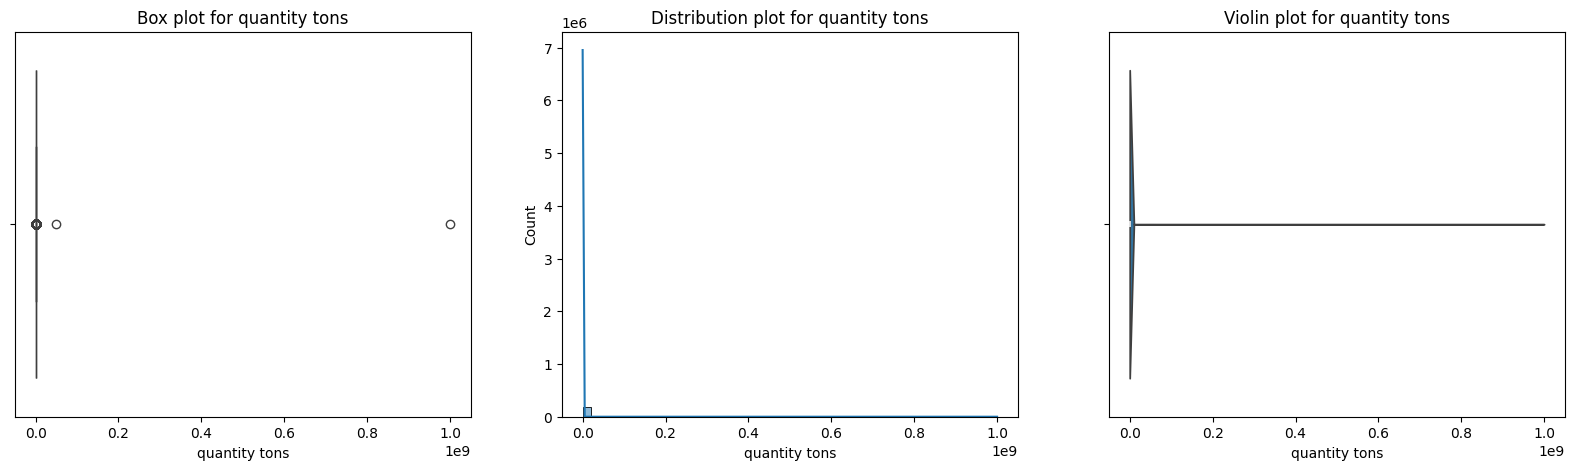

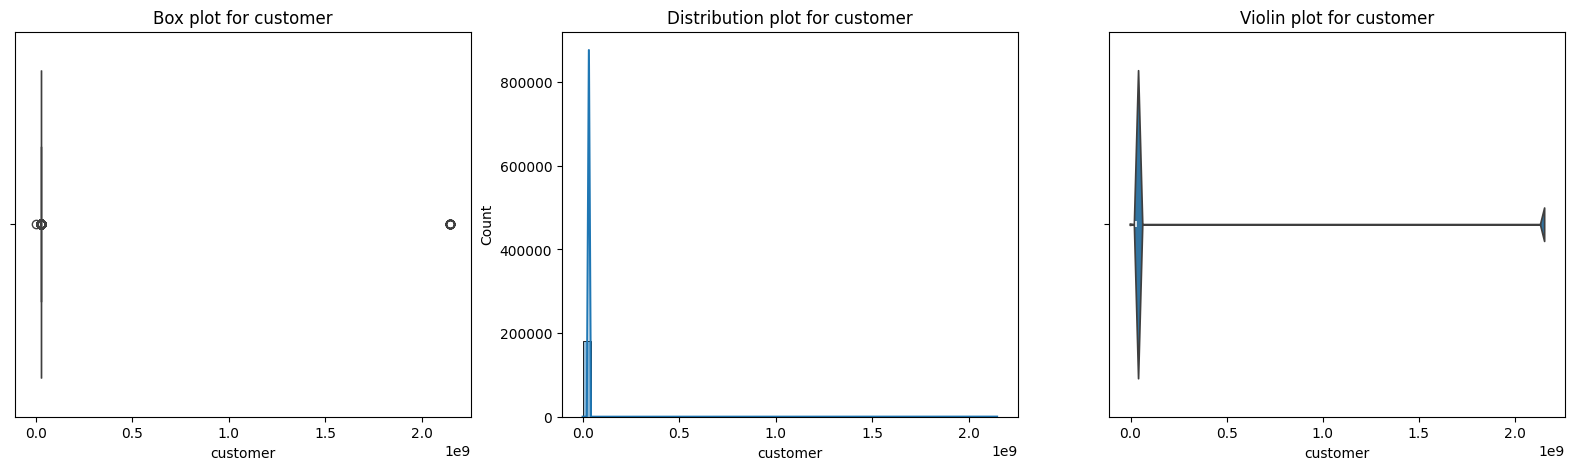

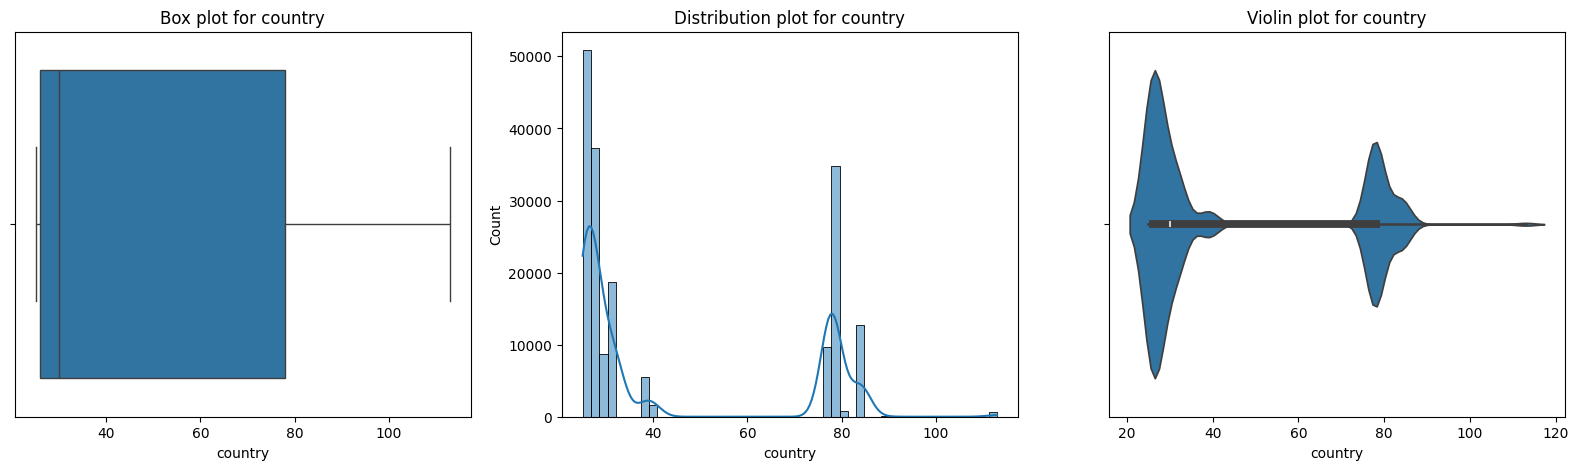

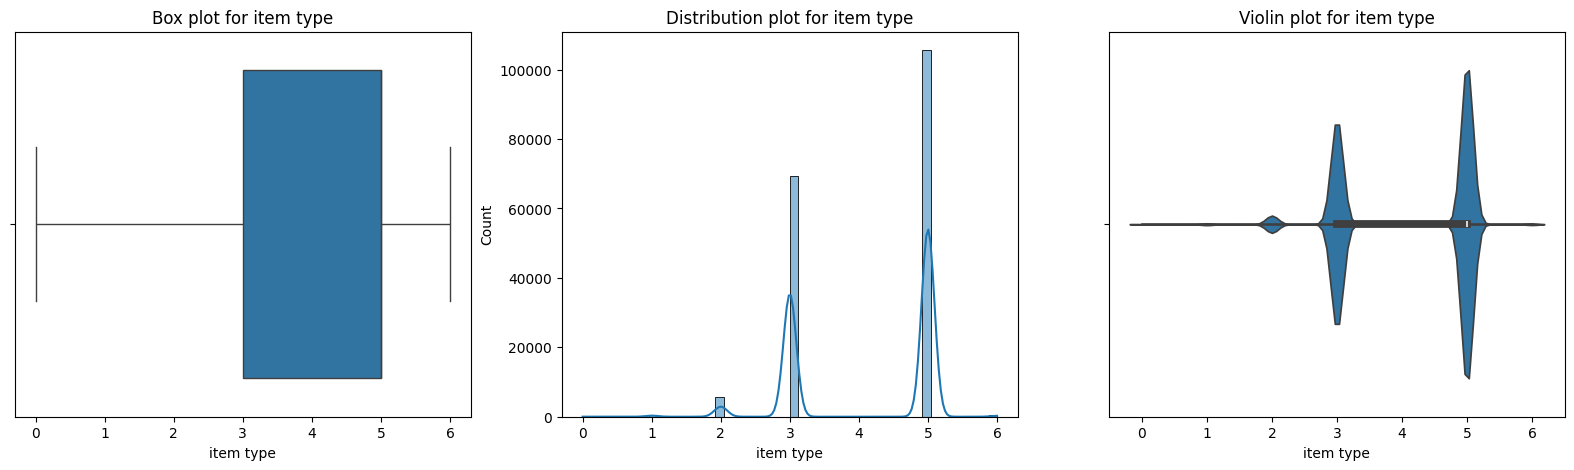

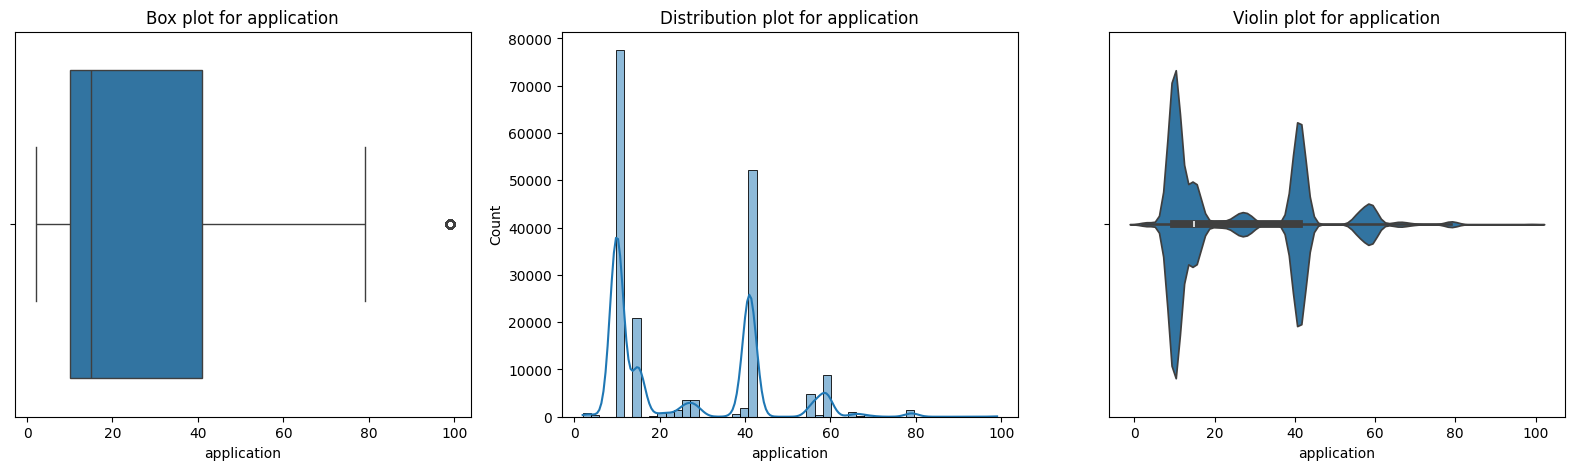

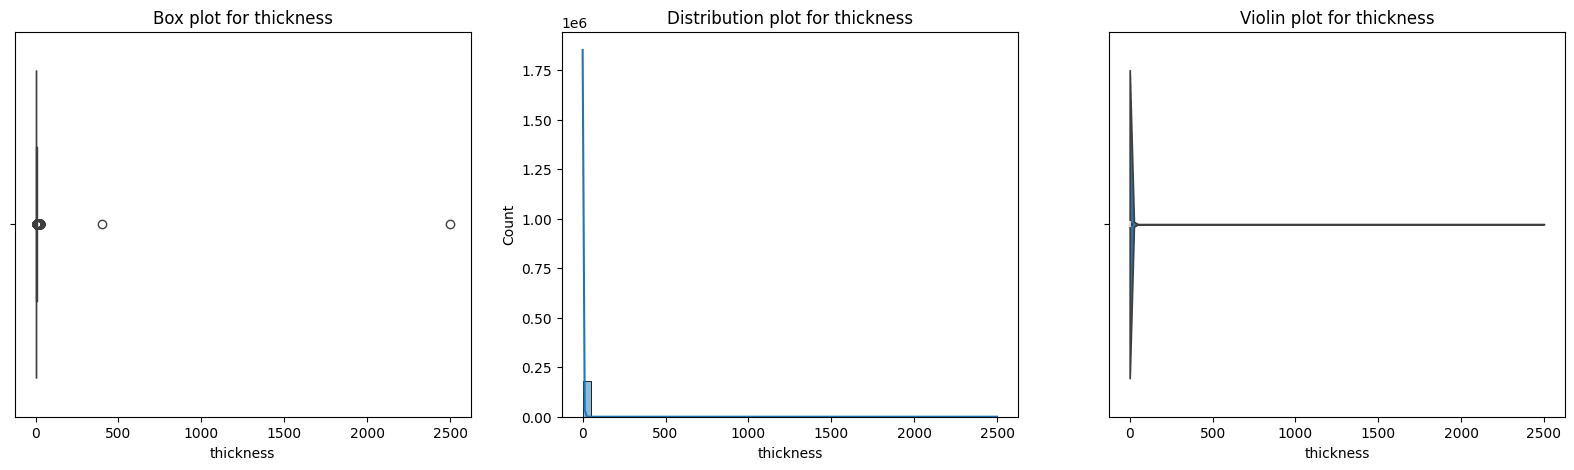

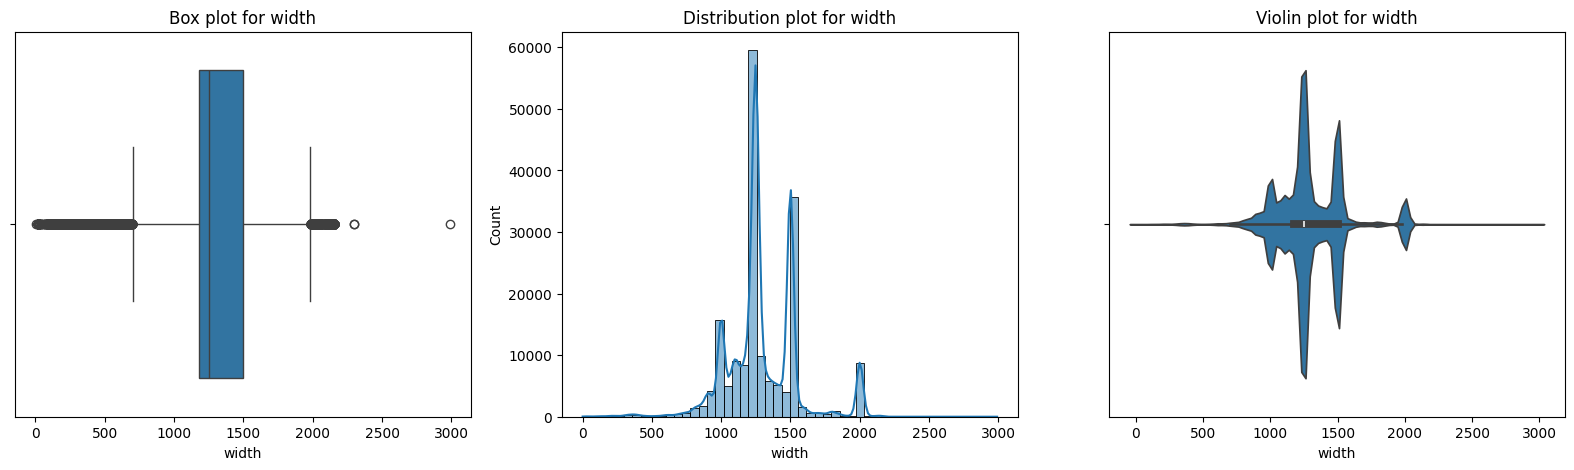

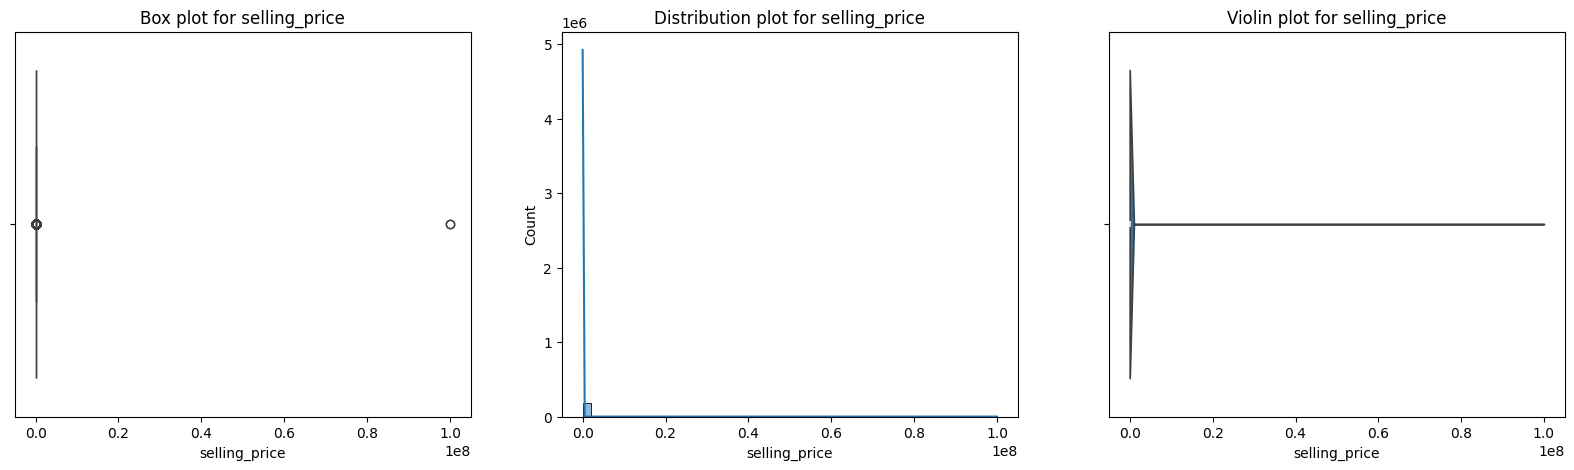

In [28]:
# plotting the features to check skew and outliers

for i in ["quantity tons", "customer", "country", "item type", "application", "thickness", "width", "selling_price"]:
    plot(df1, i)

In [29]:
# quantity tons, thickness and selling price data are skewed, so using the log transformation method to handle the skewness data


df1["quantity tons_log"] = np.log(df1["quantity tons"])
df1["thickness_log"] = np.log(df1["thickness"])
df1["selling_price_log"] = np.log(df1["selling_price"])
df1

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_time_taken,quantity tons_log,thickness_log,selling_price_log
0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,854.00,91.0,3.991779,0.693147,6.749931
1,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,1047.00,0.0,6.643822,-0.223144,6.953684
2,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,644.33,90.0,5.956169,-0.967584,6.468211
3,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,768.00,90.0,5.310301,0.832909,6.643790
4,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,577.00,31.0,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,591.00,1.0,4.629691,-0.040822,6.381816
181669,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,589.00,1.0,5.337954,-0.051293,6.378426
181670,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,619.00,1.0,1.443523,-0.342490,6.428105
181671,30.365013,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,601.00,1.0,3.413291,-0.162519,6.398595


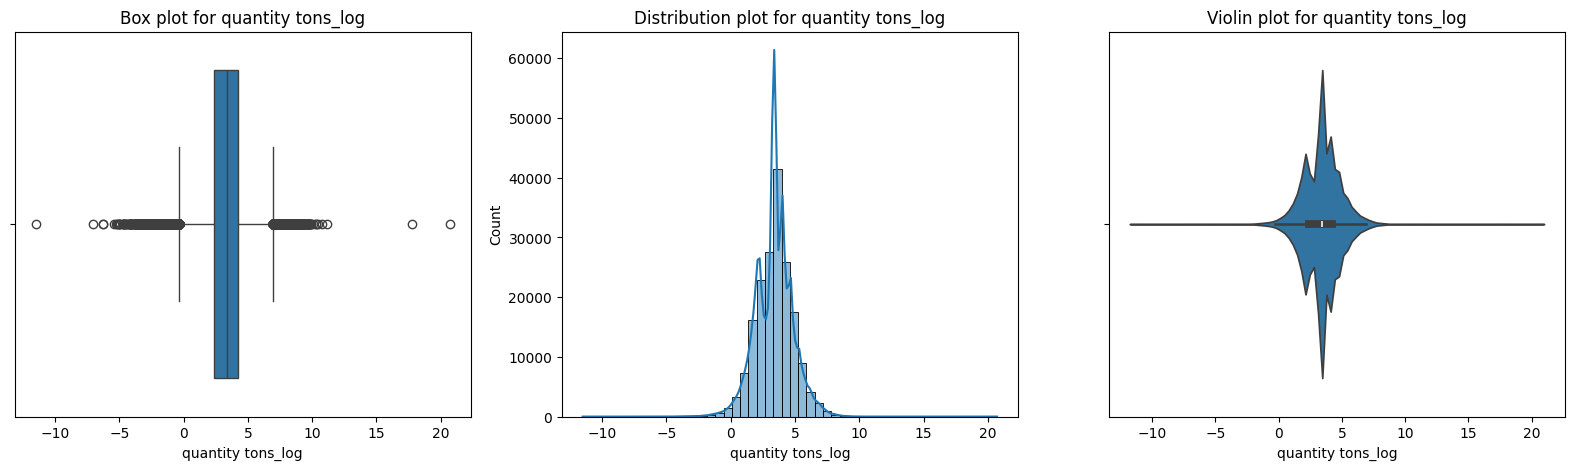

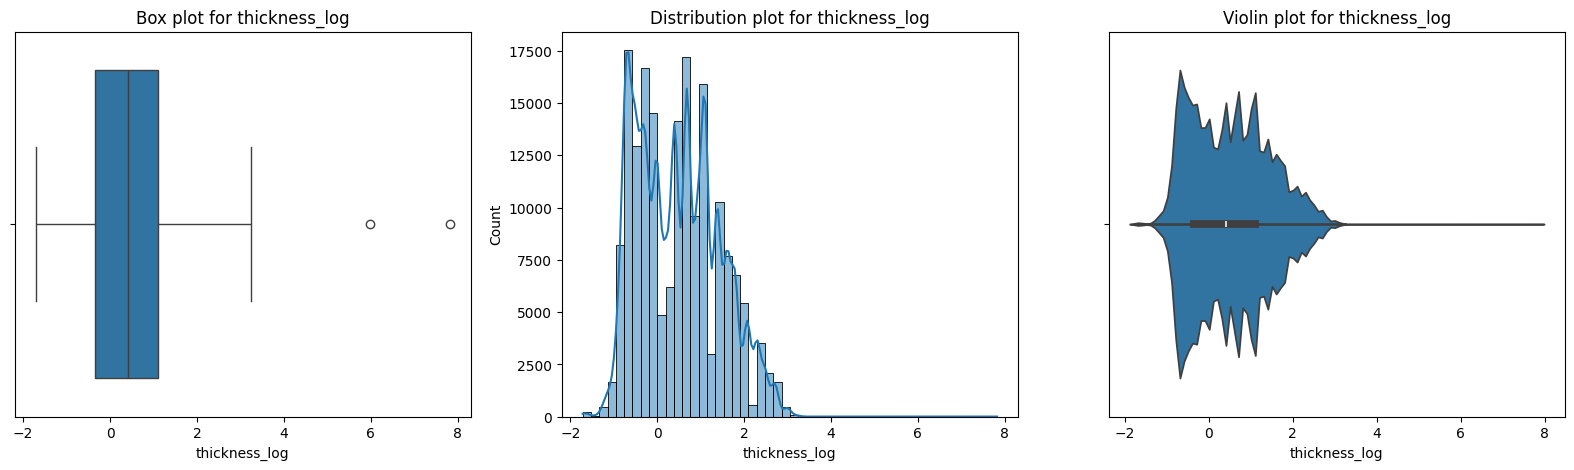

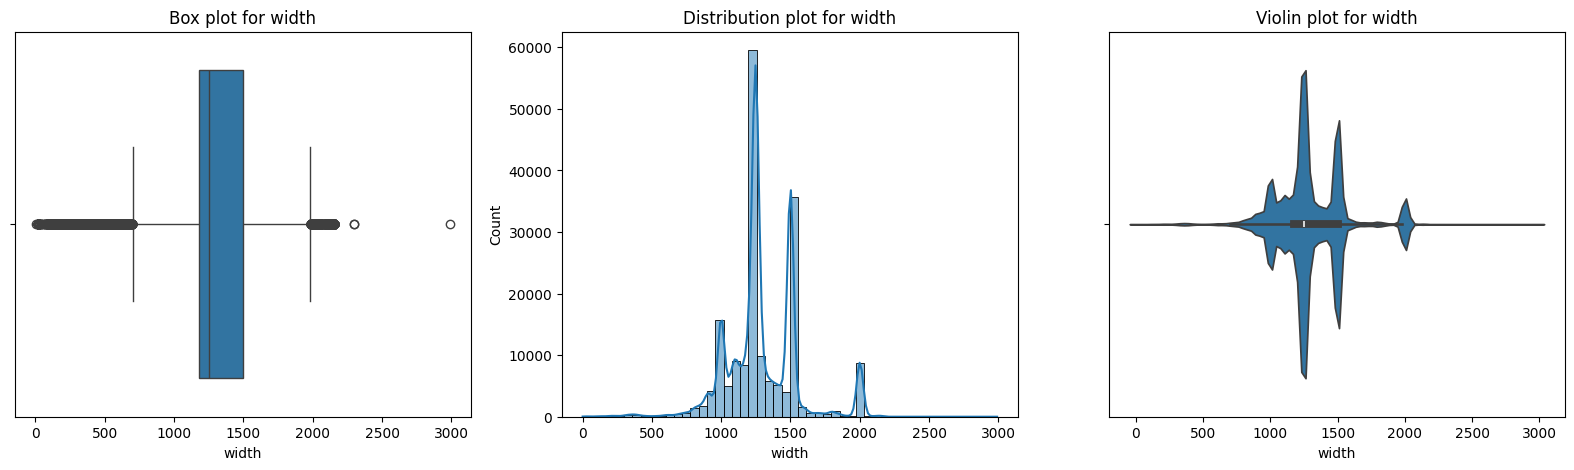

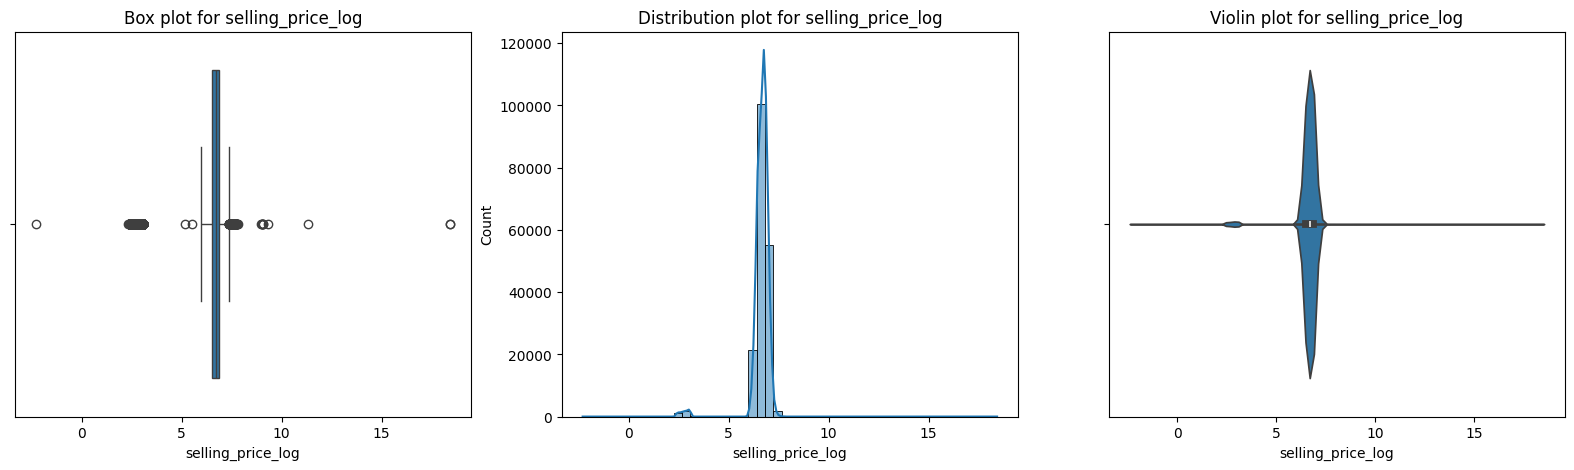

In [30]:
# after the log transformation the data are normally distributed and reduced the skewness.
for i in ["quantity tons_log", "thickness_log", "width", "selling_price_log"]:
    plot(df1, i)

Outliers handling - Intrquartile Range (IQR) method


In [31]:
#dropping columns

df1.drop(columns=['quantity tons','thickness','selling_price'], inplace=True)
df1.head()

,customer,country,status,item type,application,width,product_ref,delivery_time_taken,quantity tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,0.0,6.643822,-0.223144,6.953684
2,30153963.0,30.0,1,6.0,28.0,952.0,628377,90.0,5.956169,-0.967584,6.468211
3,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,90.0,5.310301,0.832909,6.643790
4,30211560.0,28.0,1,5.0,10.0,2000.0,640665,31.0,6.666354,1.386294,6.357842


In [32]:
# using IQR  and clip() method to handle the outliers and add new column to dataframe

def outliers(df, column):
    iqr= df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_thershold= df[column].quantile(0.75) + (1.5*iqr)
    lower_thershold= df[column].quantile(0.25) - (1.5*iqr)
    df[column]=df[column].clip(lower_thershold, upper_thershold)

In [33]:
# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

outliers(df1, "quantity tons_log")
outliers(df1, "thickness_log")
outliers(df1, "selling_price_log")
outliers(df1, "width")
df1

,customer,country,status,item type,application,width,product_ref,delivery_time_taken,quantity tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,0.0,6.643822,-0.223144,6.953684
2,30153963.0,30.0,1,6.0,28.0,952.0,628377,90.0,5.956169,-0.967584,6.468211
3,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,90.0,5.310301,0.832909,6.643790
4,30211560.0,28.0,1,5.0,10.0,1980.0,640665,31.0,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,1.0,4.629691,-0.040822,6.381816
181669,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,1.0,5.337954,-0.051293,6.378426
181670,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.0,1.443523,-0.342490,6.428105
181671,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.0,3.413291,-0.162519,6.398595


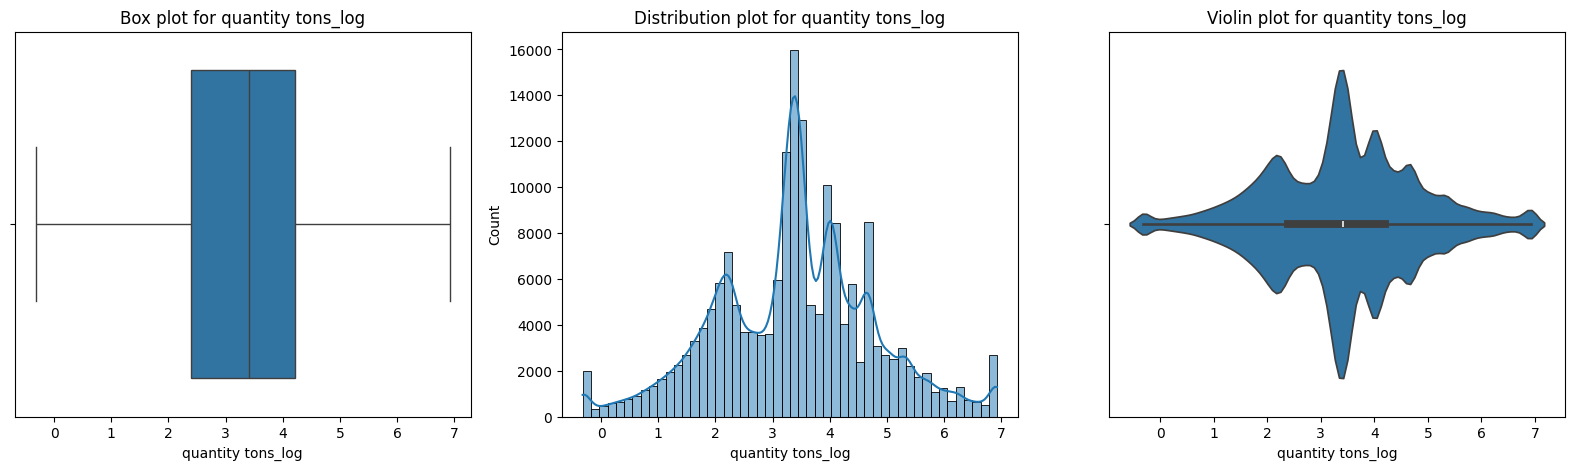

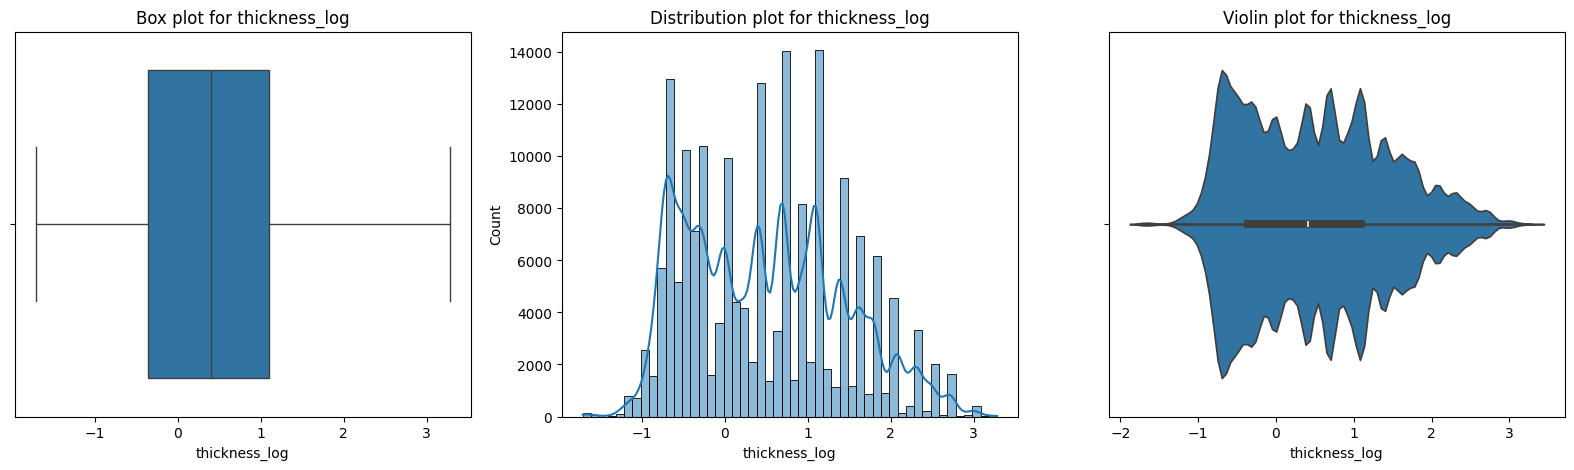

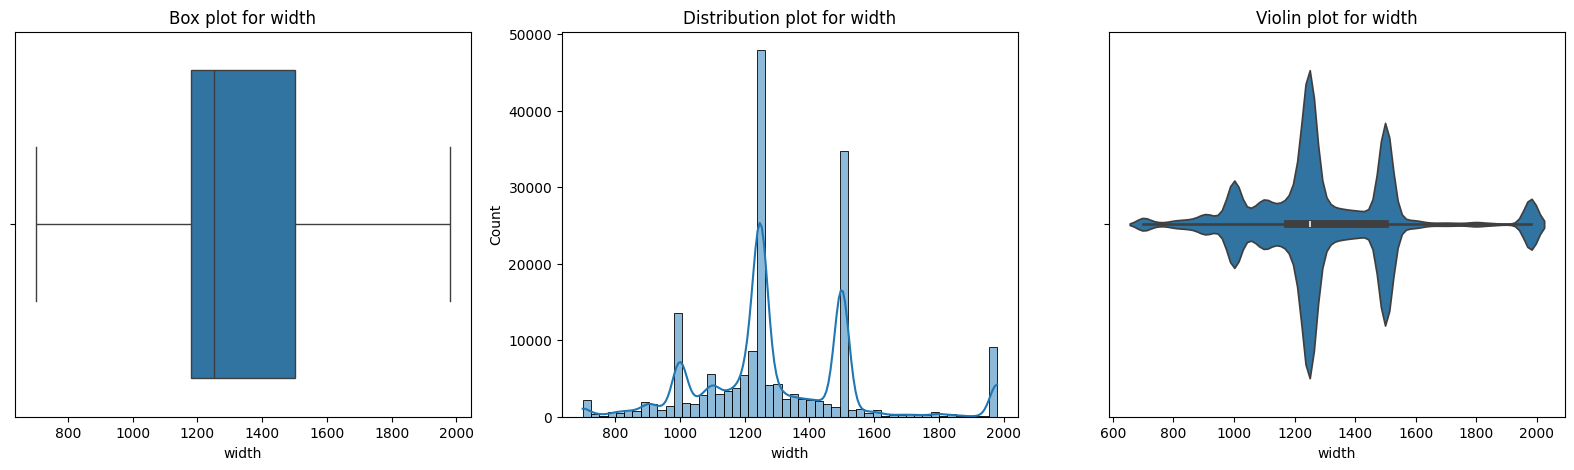

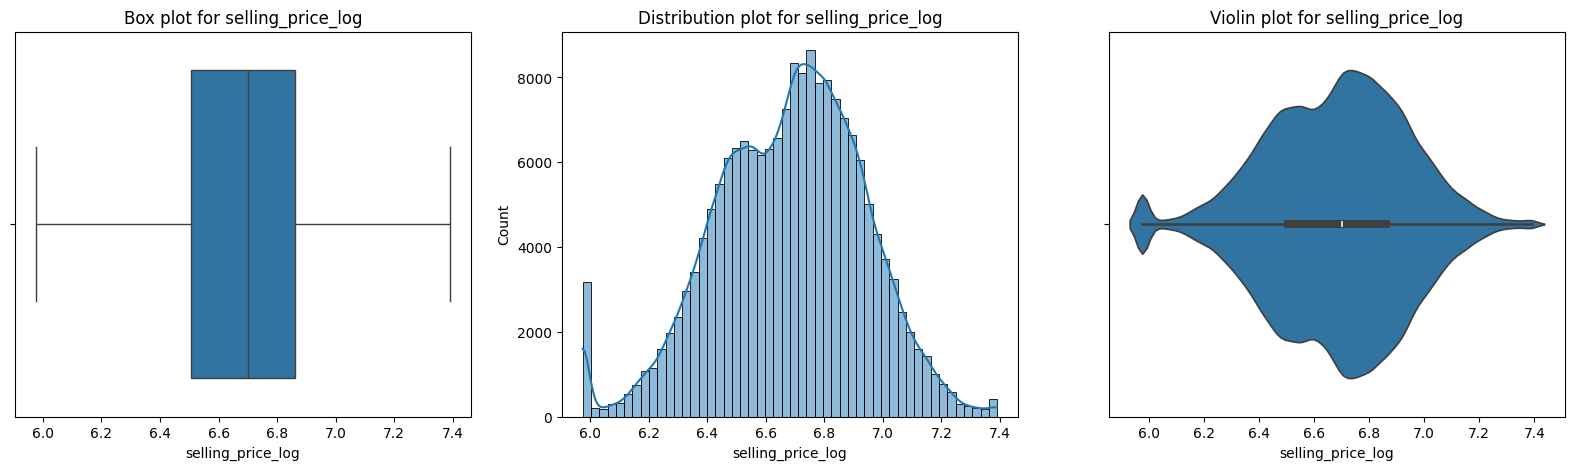

In [34]:
# after transfer the outliers with in the range
for i in ["quantity tons_log", "thickness_log", "width", "selling_price_log"]:
    plot(df1, i)

<Axes: >

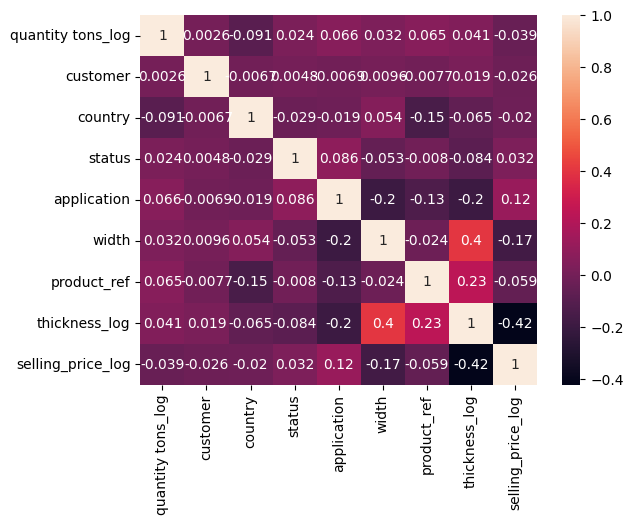

In [35]:
#verify the columns are highly corelated using heatmap, if any columns corelation is >= 0.7, then drop that column.

col= ["quantity tons_log", "customer", "country", "status", "application", "width", "product_ref", "thickness_log", "selling_price_log"]
df_HM = df1[col].corr()
sns.heatmap(df_HM, annot= True)

The highest value is 0.4 and -0.42, so no need to drop any columns

# Regression model to predict selling price


In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics
import numpy as np
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor




In [37]:
df2 = df1.copy()
df2

,customer,country,status,item type,application,width,product_ref,delivery_time_taken,quantity tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,0.0,6.643822,-0.223144,6.953684
2,30153963.0,30.0,1,6.0,28.0,952.0,628377,90.0,5.956169,-0.967584,6.468211
3,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,90.0,5.310301,0.832909,6.643790
4,30211560.0,28.0,1,5.0,10.0,1980.0,640665,31.0,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,1.0,4.629691,-0.040822,6.381816
181669,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,1.0,5.337954,-0.051293,6.378426
181670,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.0,1.443523,-0.342490,6.428105
181671,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.0,3.413291,-0.162519,6.398595


In [38]:
#checking values count to encoding the catogorical features

df2["status"].value_counts()

status
1    116012
0     34438
4     19573
6      4276
3      4170
2      3140
7        53
8        10
5         1
Name: count, dtype: int64

In [39]:
#checking values count to encoding the catogorical features

df2['item type'].value_counts()

item type
5.0    105615
3.0     69236
2.0      5660
1.0       610
6.0       524
0.0        27
4.0         1
Name: count, dtype: int64

In [40]:
df2.head()

,customer,country,status,item type,application,width,product_ref,delivery_time_taken,quantity tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,0.0,6.643822,-0.223144,6.953684
2,30153963.0,30.0,1,6.0,28.0,952.0,628377,90.0,5.956169,-0.967584,6.468211
3,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,90.0,5.310301,0.832909,6.643790
4,30211560.0,28.0,1,5.0,10.0,1980.0,640665,31.0,6.666354,1.386294,6.357842


In [41]:
# function to choose the best algorithm

def ML_algorithm(df,algorithms):
        x=df.drop(columns=['selling_price_log'],axis=1)
        y=df['selling_price_log']

        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

        results={}

        for algorithm in algorithms:

                model=algorithm().fit(x_train,y_train)
                y_pred=model.predict(x_test)
                
                MAE=metrics.mean_absolute_error(y_test, y_pred)
                MSE=metrics.mean_squared_error(y_test, y_pred)
                RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
                r2 = metrics.r2_score(y_test, y_pred)

                results[algorithm.__name__] = {'Mean Absolute Error':MAE,'Mean Squared Error':MSE,'Root Mean Squared Error':RMSE,
                                        'R² score':r2}
                
        best_algorithm = max(results.items(), key=lambda item: item[1]['R² score'])[0]  
        
        return best_algorithm, results        

In [42]:
# using above function try to identify the best algorithm

algorithms = [LinearRegression, DecisionTreeRegressor, ExtraTreesRegressor, RandomForestRegressor,
            GradientBoostingRegressor, XGBRegressor]
best_algorithm, results = ML_algorithm(df2, algorithms)

results_df = pd.DataFrame(results).transpose()

print("**Evaluation Metrics for All Algorithms:**")
print(results_df.to_string())

print("**Best Algorithm:**",best_algorithm)

**Evaluation Metrics for All Algorithms:**
                           Mean Absolute Error  Mean Squared Error  Root Mean Squared Error  R² score
LinearRegression                      0.162836            0.045489                 0.213281  0.302651
DecisionTreeRegressor                 0.054081            0.010158                 0.100788  0.844272
ExtraTreesRegressor                   0.046225            0.005698                 0.075485  0.912649
RandomForestRegressor                 0.045858            0.005543                 0.074454  0.915020
GradientBoostingRegressor             0.118057            0.021458                 0.146487  0.671040
XGBRegressor                          0.079373            0.011073                 0.105230  0.830243
**Best Algorithm:** RandomForestRegressor


In [43]:
# hyper parameter tuning to identify the best parameter using gridsearch cv

x=df2.drop(columns=['selling_price_log'],axis=1)
y=df2['selling_price_log']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

param_grid = { 
    'n_estimators' :[100,150],
    'max_depth': [10,20],     
    'min_samples_split': [2,4], 
    'min_samples_leaf': [1,2],
    'max_features'    : ['sqrt', 'log2', None] }


grid_search = GridSearchCV(estimator=RandomForestRegressor(),
                            param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(x_train, y_train)

grid_search.best_params_,grid_search.best_score_

({'max_depth': 20,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 150},
 0.8953241864143807)

In [44]:
# with best algorithm matching the parameter from above result and train the model

x=df2.drop(columns=['selling_price_log'],axis=1)
y=df2['selling_price_log']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model_regressor = RandomForestRegressor(n_estimators=150,max_features=None,max_depth=20,min_samples_leaf=1,min_samples_split=2,random_state=42)
model_regressor.fit(x_train, y_train)

y_pred = model_regressor.predict(x_test)

# evaluation metrics 
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.04863382891978799
Mean Squared Error: 0.005848451245064822
Root Mean Squared Error: 0.07647516750596119
R-squared: 0.9103422140894231


In [45]:
#checkig the features scores and importants

feature_scores = pd.Series(model_regressor.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

product_ref            0.295685
delivery_time_taken    0.245749
status                 0.173056
country                0.072319
customer               0.067350
thickness_log          0.043562
quantity tons_log      0.042055
application            0.022985
item type              0.019442
width                  0.017796
dtype: float64

In [46]:
# store the model using pickle

with open('Regressormodelfile.pkl','wb') as files:
    pickle.dump(model_regressor,files)

In [47]:
#load the pickle and predict the selling price with regressor model

with open('Regressormodelfile.pkl','rb') as files:
    predict_model=pickle.load(files)

pre=predict_model.predict(np.array([[30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,91.0,3.991779,0.693147]]))
np.exp(pre[0])

771.2314901833679

# Classifier Model to predict the Status

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc

In [49]:
#filter out the values (won|lost) in status column

dfc=df2[(df2.status==1)|(df2.status==0)]
dfc

,customer,country,status,item type,application,width,product_ref,delivery_time_taken,quantity tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,0.0,6.643822,-0.223144,6.953684
2,30153963.0,30.0,1,6.0,28.0,952.0,628377,90.0,5.956169,-0.967584,6.468211
3,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,90.0,5.310301,0.832909,6.643790
4,30211560.0,28.0,1,5.0,10.0,1980.0,640665,31.0,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,1.0,4.629691,-0.040822,6.381816
181669,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,1.0,5.337954,-0.051293,6.378426
181670,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.0,1.443523,-0.342490,6.428105
181671,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.0,3.413291,-0.162519,6.398595


In [64]:
df["customer"].unique()

array([30156308., 30202938., 30153963., ..., 30349515., 30284694.,
       30161559.])

In [50]:
#checking balance of the status values

dfc['status'].value_counts()

status
1    116012
0     34438
Name: count, dtype: int64

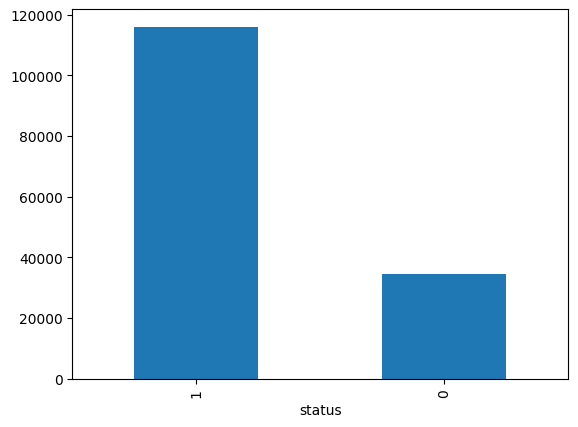

In [62]:
ax=dfc['status'].value_counts().plot.bar()


Text(0.5, 1.0, 'over oversampling using smote')

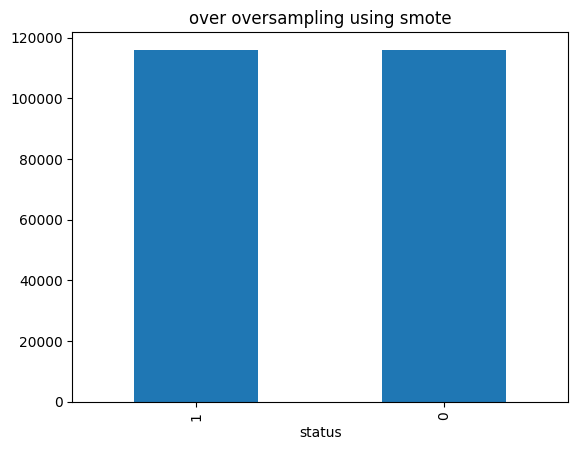

In [63]:
# oversampling the data using SMOTE 

x=dfc.drop('status',axis=1)
y=dfc['status']

smote= SMOTE()

x_smote, y_smote = smote.fit_resample(x,y) 

ax=y_smote.value_counts().plot.bar()
ax.set_title('over oversampling using smote')

In [53]:
#function to get the best classifier algorithm

def best_ML_class_algo(x_smote,y_smote,algorithms):
        
        x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=42)

        results={}

        for algorithm in algorithms:

                model=algorithm().fit(x_train,y_train)
                y_pred=model.predict(x_test)

                accuracy =metrics. accuracy_score(y_test, y_pred)
                precision =metrics. precision_score(y_test, y_pred)
                recall =metrics. recall_score(y_test, y_pred)
                f1 = metrics.f1_score(y_test, y_pred)

                results[algorithm.__name__] = {'Accuracy score': accuracy,'Precision': precision,'Recall': recall,'F1-score': f1}
                
        best_algorithm = max(results.items(), key=lambda item: item[1]['Accuracy score'])[0]  
        
        return best_algorithm, results  

In [54]:
# using above function try to identify the best algorithm

algorithms = [ DecisionTreeClassifier, ExtraTreesClassifier, RandomForestClassifier,
            GradientBoostingClassifier, XGBClassifier]
best_algorithm, results = best_ML_class_algo(x_smote,y_smote, algorithms)

results_df = pd.DataFrame(results).transpose()

print("**Evaluation Metrics for All Algorithms:**")
print(results_df.to_string())

print("**Best Algorithm:**",best_algorithm)

**Evaluation Metrics for All Algorithms:**
                            Accuracy score  Precision    Recall  F1-score
DecisionTreeClassifier            0.956442   0.956376  0.955989  0.956182
ExtraTreesClassifier              0.977287   0.986764  0.967288  0.976929
RandomForestClassifier            0.974802   0.983430  0.965583  0.974425
GradientBoostingClassifier        0.799994   0.813161  0.775986  0.794139
XGBClassifier                     0.933197   0.949626  0.914116  0.931533
**Best Algorithm:** ExtraTreesClassifier


In [55]:
# hyper parameter tuning to identify the best parameter using gridsearch cv

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=42)

param_grid = {
    'n_estimators' :[50,100],
    'max_depth': [ 10,20,25],     
    'min_samples_split': [2, 4],  
    'min_samples_leaf': [1, 2]     }


model = ExtraTreesClassifier(random_state=42) 

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring="accuracy",n_jobs=-1)

grid_search.fit(x_train, y_train)

grid_search.best_params_,grid_search.best_score_

({'max_depth': 25,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.9626576178483031)

In [56]:
# with best algorithm matching the parameter from bove result and train the model

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=42)

model_classifier = ExtraTreesClassifier(n_estimators=100,max_depth=25,min_samples_leaf=1,min_samples_split=2)
model_classifier.fit(x_train, y_train)

y_pred = model_classifier.predict(x_test)

# evaluation metrics
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

[[34608   395]
 [ 1973 32632]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     35003
           1       0.99      0.94      0.96     34605

    accuracy                           0.97     69608
   macro avg       0.97      0.97      0.97     69608
weighted avg       0.97      0.97      0.97     69608



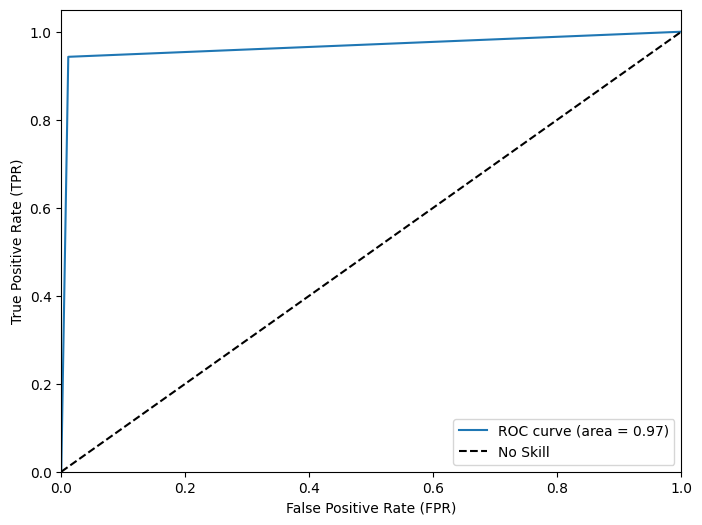

In [57]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

fpr, tpr, thresholds = roc_curve(y_test,y_pred)
auc_curve=auc(x=fpr,y=tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_curve)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")
plt.show()

In [58]:
#checkig the features scores and importants

feature_scores = pd.Series(model_classifier.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

delivery_time_taken    0.180431
item type              0.133216
customer               0.126445
country                0.115765
application            0.105189
quantity tons_log      0.089633
selling_price_log      0.076892
product_ref            0.064418
thickness_log          0.063574
width                  0.044438
dtype: float64

In [59]:
# store the model using pickle

with open('Classifiermodelfile.pkl','wb') as  files:
    pickle.dump(model_classifier,files)

In [60]:
# load the pickle and predict the status with classifier model

with open('Classifiermodelfile.pkl','rb') as files:
    clas_model=pickle.load(files)

cla = clas_model.predict( np.array([[30156308.0,28.0,5.0,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931]]))
if cla[0] == 1:
    print('Won')
else:
    print('Lose')

Won
